## **ID3 Decision Tree with No Pruning**

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
from google.colab import files
uploaded = files.upload()

Saving banknote_auth_dataset.xlsx to banknote_auth_dataset (3).xlsx


In [108]:
import io
dataset = pd.read_excel(io.BytesIO(uploaded['banknote_auth_dataset.xlsx']))

In [109]:
dataset

,Variance,Skewness,Kurtosis,Entropy,Authenticity
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [110]:
X = dataset.drop('Authenticity', axis = 1)
Y = dataset['Authenticity']

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [113]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
predicted_df

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
1342,1,1
251,0,0
1256,1,1
966,1,1


In [114]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[154   3]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       157
           1       0.97      0.99      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455


[Text(435.9375, 509.625, 'X[0] <= 0.274\nentropy = 0.992\nsamples = 1097\nvalue = [605, 492]'),
 Text(261.5625, 441.675, 'X[1] <= 5.865\nentropy = 0.679\nsamples = 524\nvalue = [94, 430]'),
 Text(139.5, 373.725, 'X[2] <= 6.746\nentropy = 0.278\nsamples = 416\nvalue = [20, 396]'),
 Text(69.75, 305.775, 'X[0] <= -0.257\nentropy = 0.032\nsamples = 304\nvalue = [1, 303]'),
 Text(34.875, 237.825, 'entropy = 0.0\nsamples = 266\nvalue = [0, 266]'),
 Text(104.625, 237.825, 'X[2] <= 3.521\nentropy = 0.176\nsamples = 38\nvalue = [1, 37]'),
 Text(69.75, 169.875, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(139.5, 169.875, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(209.25, 305.775, 'X[1] <= -4.8\nentropy = 0.657\nsamples = 112\nvalue = [19, 93]'),
 Text(174.375, 237.825, 'entropy = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(244.125, 237.825, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(383.625, 373.725, 'X[0] <= -3.445\nentropy = 0.899\nsamples = 108\nvalue = [74, 34

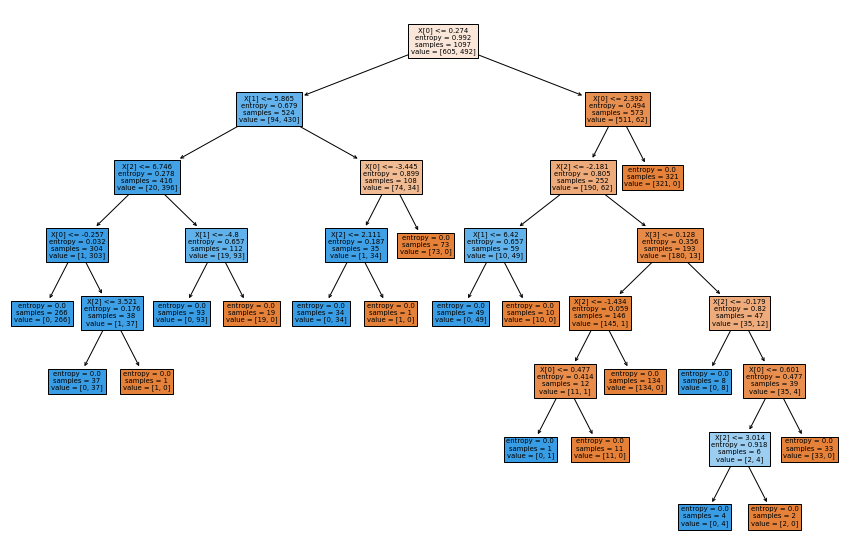

In [115]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)

##**Pruning the Decision Tree**

In [116]:
classifier_prune = DecisionTreeClassifier(criterion="entropy", max_depth=4)  
classifier_prune.fit(X_train, Y_train)
Y_pred_prune = classifier_prune.predict(X_test)

In [117]:
predicted_pruned_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred_prune})
predicted_pruned_df

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
1342,1,1
251,0,0
1256,1,1
966,1,1


In [118]:
print(confusion_matrix(Y_test, Y_pred_prune))
print(classification_report(Y_test, Y_pred_prune))
print(accuracy_score(Y_test, Y_pred_prune))

[[154   3]
 [  6 112]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       157
           1       0.97      0.95      0.96       118

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

0.9672727272727273


[Text(512.6625, 489.24, 'X[0] <= 0.274\nentropy = 0.992\nsamples = 1097\nvalue = [605, 492]'),
 Text(313.875, 380.52000000000004, 'X[1] <= 5.865\nentropy = 0.679\nsamples = 524\nvalue = [94, 430]'),
 Text(167.4, 271.8, 'X[2] <= 6.746\nentropy = 0.278\nsamples = 416\nvalue = [20, 396]'),
 Text(83.7, 163.08000000000004, 'X[0] <= -0.257\nentropy = 0.032\nsamples = 304\nvalue = [1, 303]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.0\nsamples = 266\nvalue = [0, 266]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.176\nsamples = 38\nvalue = [1, 37]'),
 Text(251.10000000000002, 163.08000000000004, 'X[1] <= -4.8\nentropy = 0.657\nsamples = 112\nvalue = [19, 93]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(460.35, 271.8, 'X[0] <= -3.445\nentropy = 0.899\nsamples = 108\nvalue = [74, 34]'),
 Text(418.5, 163.08000000000004, 'X[3] <= -1.916\nentropy = 0

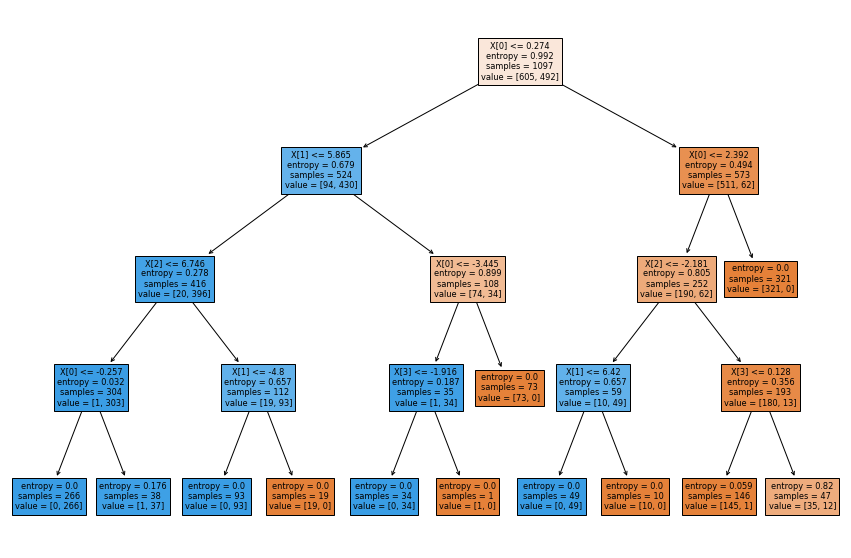

In [119]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_prune, filled=True)